##### Import Modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Discrete Uniform PMF

$$p(x) = \frac{1}{b-a+1}$$

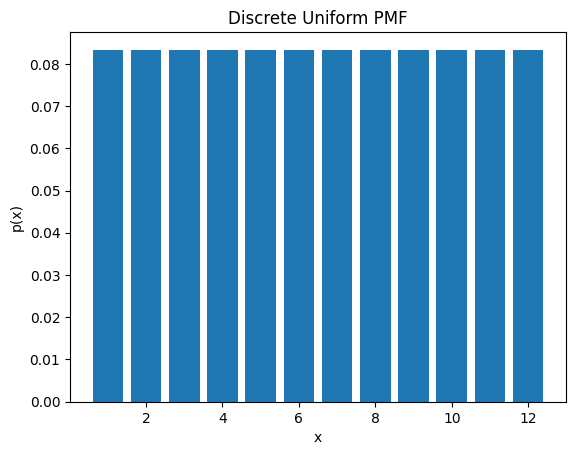

In [ ]:
# @title
# @markdown minimum value
a = 1 # @param {type:"integer"}
# @markdown maximum value
b = 6 # @param {type:"integer"}


def pmf(i,a,b):
  return 1/(b-a+1)

def plot():
  global a,b
  xs =np.arange(a,b+1)
  ys = [pmf(i,a,b) for i in xs]
  plt.bar(xs,ys)
  plt.xlabel('x')
  plt.ylabel('p(x)')
  plt.title('Discrete Uniform PMF')
  plt.show()

plot()

## Bernoulli PMF

$$ p_k(x)=  \left\{
\begin{array}{ll}
      p & k=1 \\
      1-p & k=0 \\
\end{array}
\right. $$

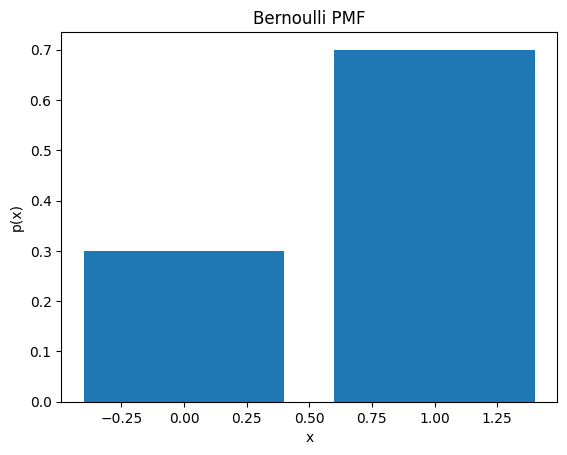

In [ ]:
# @title
# @markdown probability of success
p = 0.7 # @param {type:"number"}

def pmf(k,p):
  if k == 0:
    return 1-p
  return p


def plot():
  global p
  xs = [0,1]
  ys = [pmf(i,p) for i in xs]
  plt.bar(xs,ys)
  plt.xlabel('x')
  plt.ylabel('p(x)')
  plt.title('Bernoulli PMF')
  plt.show()

plot()

## Binomial PMF

$$
p(x) = \binom nr p^r q^{n-r}
$$


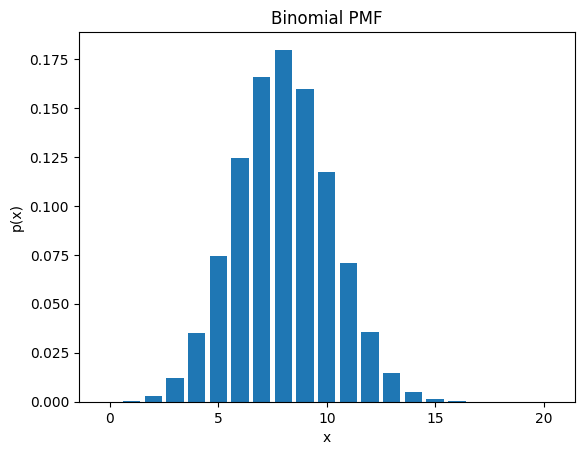

In [ ]:
# @title
# @markdown number of trials
n = 20 # @param {type:"integer"}
# @markdown probability of success
p = 0.4 # @param {type:"number"}

f={0:1,1:1}
def factorial(n):
  if n in f:
    return f[n]
  return n*factorial(n-1)

def pmfbin(r,n,p):
  # ncr (p)^r (1-p)^(n-r)
  return np.multiply(np.multiply(np.divide(factorial(n),np.multiply(factorial(n-r),factorial(r))),p**r),(1-p)**(n-r)) # i am using np.multiply, or np.divide to circumvent any error replated to precision or overflow

def plot(n,p):
  xs =np.arange(n+1)
  ys = [pmfbin(i,n,p) for i in xs]
  plt.bar(xs,ys)
  plt.xlabel('x')
  plt.ylabel('p(x)')
  plt.title('Binomial PMF')
  plt.show()

plot(n,p)
plotbin = plot

## Poisson PMF

$$
p(x) = \frac{e^{-λ}λ^x}{x!}
$$

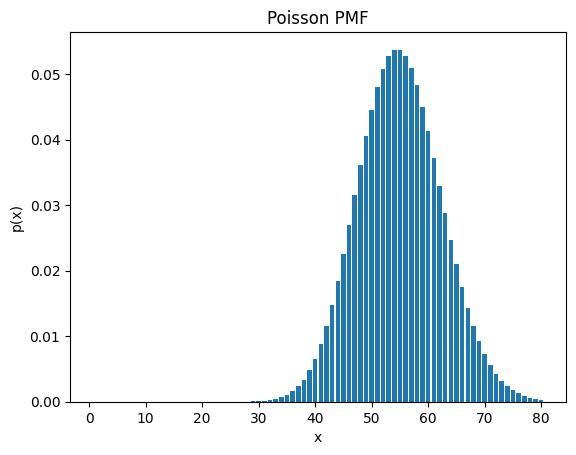

In [ ]:
# @title
# @markdown number of trials
n = 80 # @param {type:"number"}
# @markdown number of successes
l = 55 # @param {type:"number"}

f={0:1,1:1}
def factorial(n):
  if n in f:
    return f[n]
  v= n*factorial(n-1)
  f[n] = v
  return v

def pmfpoi(l,k):
  return np.exp(-l)*(l**k)/factorial(k)
def plot_poisson():
  xs =range(1,n+1)
  ys = [pmfpoi(l,i) for i in xs]
  plt.bar(xs,ys)
  plt.xlabel('x')
  plt.ylabel('p(x)')
  plt.title('Poisson PMF')

plot_poisson()
plt.show()

## Geometric PMF

$$
p_k(x) = (1-p)^{x-1}p
$$

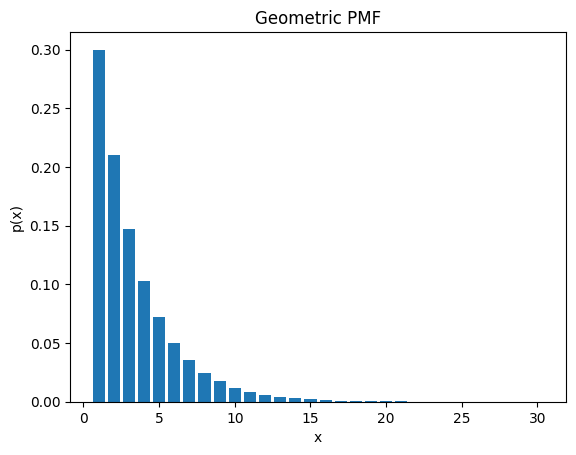

In [ ]:
# @title
# @markdown number of trials
n = 30 # @param {type:"integer"}
# @markdown probability of success
p = 0.3 # @param {type:"number"}

def pmf(p,k):
  return np.multiply(np.power(1-p,k-1),p)

def plot():
  global p,n
  xs = np.arange(1,n+1)
  ys = [pmf(p,i) for i in xs]
  plt.bar(xs,ys)
  plt.xlabel('x')
  plt.ylabel('p(x)')
  plt.title('Geometric PMF')
  plt.show()

plot()

## Comparing Poisson and Binomial PMF

Show the equivalence of Binomial and Poisson for large values of M and small values of p.

$\lambda = M \times p$ <br>
Let $M = 50$, $\lambda = 10$ <br>
$\implies p = \frac{\lambda}{M} = 0.2$

Comparing Binomial and Poisson PMF


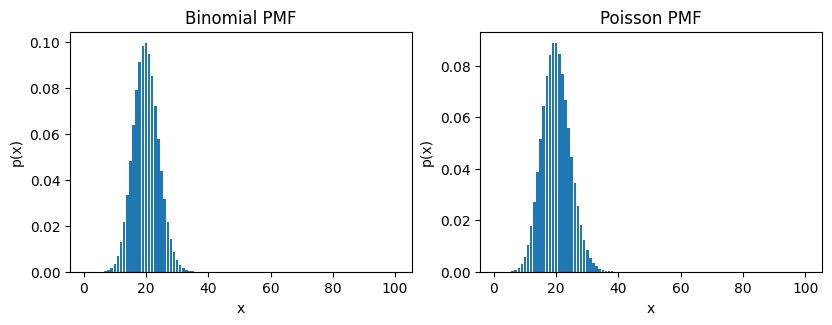


Mean Square Error = 6.2912782887913475e-06


In [ ]:
from scipy.special import factorial as spclfactorial
use_scipy_factorial = False # set this to true to have a smoother curve for poisson pmf

n = 100.0
p = 0.2

if use_scipy_factorial:
  factorial = spclfactorial
else:
  f={0:1,1:1}
  def factorial(n):
    if n in f:
      return f[n]
    v= n*factorial(n-1)
    f[n] = v
    return v

l=n*p # 10
def pmfbin(r,n,p):
  # ncr (p)^r (1-p)^(n-r)
  return np.multiply(np.multiply(np.divide(factorial(n),np.multiply(factorial(n-r),factorial(r))),p**r),(1-p)**(n-r)) # i am using np.multiply, or np.divide to circumvent any error replated to precision or overflow


def pmfpoi(l,k):
  return np.exp(-l)*(l**k)/factorial(k)
def plot_binomial():
  xs =np.arange(1,n+1)
  ys = [pmfbin(i,n,p) for i in xs]
  plt.subplot(1,2,1)
  plt.bar(xs,ys)
  plt.xlabel('x')
  plt.ylabel('p(x)')
  plt.title('Binomial PMF')
  return ys

def plot_poisson():
  if use_scipy_factorial:
    xs = np.arange(1,n+1,0.5)
  else:
    xs =np.arange(1,n+1)
  ys = [pmfpoi(l,i) for i in xs]
  plt.subplot(1,2,2)
  plt.bar(xs,ys)
  plt.xlabel('x')
  plt.ylabel('p(x)')
  plt.title('Poisson PMF')
  return ys

ys1 = plot_binomial()
ys2 = plot_poisson()
print('Comparing Binomial and Poisson PMF')
plt.subplots_adjust(bottom=0.5, right=1.3, top=1)
plt.show()
print()
mse = np.average(np.power(abs(np.array(ys1) - np.array(ys2)),2))
print(f'Mean Square Error = {mse}')